# 生成数据

y = Xw+b+c

In [1]:
from IPython import display
from mxnet import autograd, nd

In [4]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0]*features[:, 0] + true_w[1]*features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [6]:
features[1], labels[1]

(
 [ 0.5925345 -0.7567092]
 <NDArray 2 @cpu(0)>, 
 [7.953081]
 <NDArray 1 @cpu(0)>)

In [72]:
from matplotlib import pyplot as plt

In [73]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

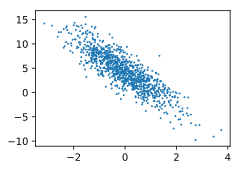

In [74]:
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

# 读取数据

In [7]:
import random

In [8]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j) #take函数根据索引返回对应元素

In [9]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[-0.4839293   1.3157597 ]
 [ 1.0956023   0.20017952]
 [-1.2781463  -0.9593797 ]
 [ 0.53071696 -0.9929965 ]
 [-1.0869656   1.7676734 ]
 [-1.7193607  -0.84718   ]
 [-1.5240194   1.4221902 ]
 [ 0.7385103   0.41367826]
 [-0.29610807 -0.0317046 ]
 [ 0.20849532 -0.71153325]]
<NDArray 10x2 @cpu(0)> 
[-1.2405584  5.6944942  4.912026   8.659339  -4.0009627  3.6465647
 -3.682176   4.2803745  3.7175543  7.033284 ]
<NDArray 10 @cpu(0)>


初始化模型参数

In [25]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [26]:
w.attach_grad()
b.attach_grad()

定义神经网络模型

In [27]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

定义损失函数

In [28]:
def squared_loss(y_hat, y):
    return(y_hat - y.reshape(y_hat.shape)) ** 2/2

定义优化算法

In [29]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr *param.grad/batch_size

In [30]:
lr = 0.03
num_epochs = 5
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss%f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss0.041051
epoch 2, loss0.000160
epoch 3, loss0.000050
epoch 4, loss0.000050
epoch 5, loss0.000050
